In [1]:
! pip install mofapy2
! pip install mofax
! pip install dtw-python
! pip install muon


     |████████████████████████████████| 950 kB 16.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mofapy2: filename=mofapy2-0.6.4-py3-none-any.whl size=119950 sha256=c9d0e174330c20e0824af1fc40aa8d8d76b48b6defaab4f6b9cbbb21434ffa9a
  Stored in directory: /root/.cache/pip/wheels/1c/85/82/5c9e8fc37c56a81e5a91818183a6ca21e96181a8e5b6681294
Successfully built mofapy2


     |████████████████████████████████| 580 kB 21.4 MB/s 
     |████████████████████████████████| 287 kB 24.9 MB/s 
     |████████████████████████████████| 2.0 MB 64.3 MB/s 
     |████████████████████████████████| 41 kB 118 kB/s 
     |████████████████████████████████| 91 kB 8.9 MB/s 
     |████████████████████████████████| 86 kB 6.0 MB/s 
     |████████████████████████████████| 48 kB 5.4 MB/s 
     |████████████████████████████████| 1.1 MB 31.4 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
  Created wheel for loompy: filename=loompy-3.0.6-py3-none-any.whl size=47906 sha256=0cf58565faf41975e4407c55beff64a33602021865c4219a662b90ce6fec699a
  Stored in directory: /root/.cache/pip/wheels/aa/84/e5/38fa2e3b59faa40b027a12a0c2de64cd787a1cbf05725fb021
  Created wheel for numpy-groupies: filename=numpy_groupies-0.9.14-py3-none-any.whl size=24113 sha256=bf16718297255672b33052bfadf46aa1f343d5b1ad46f2d554acdecf23166271
  Stored in directory: /root/.cache/pip/wheels/e7/68/13/d9f5f7dd

In [2]:
import pandas as pd
import numpy as np
from mofapy2.run.entry_point import entry_point
import seaborn as sns
import mofax
import h5py
import scanpy as sc
import muon as mu
from muon import AnnData, MuData

In [31]:
data = pd.read_csv('combined_lfc_2.txt', sep='\t')
data.head()

,Bias,compartment,view,sample,feature,value,time,group
0,GC-bias,Cyto,RNA,RNA_Bulk_1,1110008P14Rik_RNA,1.301423,1,Bulk
1,GC-bias,Cyto,RNA,RNA_Bulk_2,1110008P14Rik_RNA,2.106330,2,Bulk
2,GC-bias,Cyto,RNA,RNA_Bulk_3,1110008P14Rik_RNA,1.576377,3,Bulk
3,GC-bias,Cyto,RNA,RNA_Bulk_4,1110008P14Rik_RNA,0.827082,4,Bulk
4,GC-bias,Cyto,RNA,RNA_Bulk_5,1110008P14Rik_RNA,0.549858,5,Bulk


In [32]:
data_for_muon = data[['group', 'view', 'sample', 'feature', 'value', 'time']]
data_for_muon.head()

,group,view,sample,feature,value,time
0,Bulk,RNA,RNA_Bulk_1,1110008P14Rik_RNA,1.301423,1
1,Bulk,RNA,RNA_Bulk_2,1110008P14Rik_RNA,2.106330,2
2,Bulk,RNA,RNA_Bulk_3,1110008P14Rik_RNA,1.576377,3
3,Bulk,RNA,RNA_Bulk_4,1110008P14Rik_RNA,0.827082,4
4,Bulk,RNA,RNA_Bulk_5,1110008P14Rik_RNA,0.549858,5


In [33]:
views = data.view.unique()
data_list = [data[data.view == m].pivot(index='sample', columns='feature', values='value') for m in views]
mods = {views[m]:sc.AnnData(data_list[m]) for m in range(len(views))}
mods

{'RNA': AnnData object with n_obs × n_vars = 18 × 3858,
 'TE': AnnData object with n_obs × n_vars = 18 × 3858}

In [34]:
obs = (
    data[['sample', 'time', 'group']]
        .drop_duplicates()
        .rename(columns = {'group' : 'type'})
        .set_index('sample')
)
obs

,time,type
sample,,
RNA_Bulk_1,1,Bulk
RNA_Bulk_2,2,Bulk
RNA_Bulk_3,3,Bulk
RNA_Bulk_4,4,Bulk
RNA_Bulk_5,5,Bulk
RNA_Bulk_6,6,Bulk
TE_Bulk_1,1,Bulk
TE_Bulk_2,2,Bulk
TE_Bulk_3,3,Bulk


In [35]:
mdata = mu.MuData(mods)
mdata.obs = obs
mdata.obs

,time,type
sample,,
RNA_Bulk_1,1,Bulk
RNA_Bulk_2,2,Bulk
RNA_Bulk_3,3,Bulk
RNA_Bulk_4,4,Bulk
RNA_Bulk_5,5,Bulk
RNA_Bulk_6,6,Bulk
TE_Bulk_1,1,Bulk
TE_Bulk_2,2,Bulk
TE_Bulk_3,3,Bulk


In [39]:
print(mdata)
mdata['RNA']

MuData object with n_obs × n_vars = 36 × 7716
  obs:	'time', 'type'
  2 modalities
    RNA:	18 x 3858
    TE:	18 x 3858


AnnData object with n_obs × n_vars = 18 × 3858

In [75]:
mu.tl.mofa(mdata, use_obs='union',
           n_factors=4,
           groups_label="type",
           smooth_covariate='time', smooth_warping=False,
           smooth_kwargs={"warping_ref": "Bulk", "new_values": list(range(1, 7))},
           outfile="models/bf_diff_lfc_2.hdf5",
           n_iterations=15)


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='RNA' group='Bulk' with N=12 samples and D=3858 features...
Loaded view='RNA' group='Cyto' with N=12 samples and D=3858 features...
Loaded view='RNA' group='Crude' with N=12 samples and D=3858 features...
Loaded view='TE' group='Bulk' with N=12 samples and D=3858 features...
Loaded view='TE' group='Cyto' with N=12 samples and D=3858 features...
Loaded view='TE' group

In [53]:
palette = sns.color_palette('Set2')

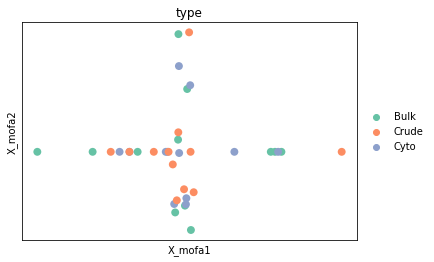

In [61]:
mu.pl.mofa(mdata, color='type', palette=palette, size=250)

KeyError: ignored

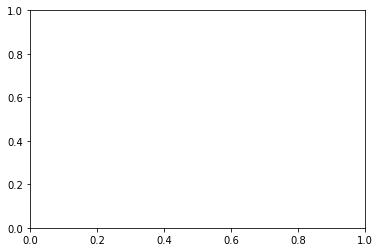

In [65]:
mu.pl.mofa(mdata, color='Bias', palette=palette, size=250)

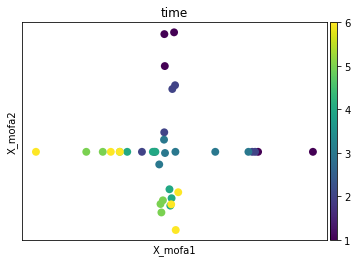

In [62]:
mu.pl.mofa(mdata, color='time', size=250)

In [63]:
mdata.obs['Factor1'] = mdata.obsm['X_mofa'][:, 0]

In [64]:
sc.pl.scatter(mdata, x='time', y='Factor2', color='view',
              palette=palette, size=200)

ValueError: ignored

In [48]:
model = mofax.mofa_model('models/bf_diff_lfc.hdf5')
model

MOFA+ model: bf diff lfc
Samples (cells): 36
Features: 7716
Groups: Bulk (12), Crude (12), Cyto (12)
Views: RNA (3858), TE (3858)
Factors: 4
Expectations: Sigma, W, Z

MEFISTO:
Covariates available: time
Interpolated factors for 6 new values

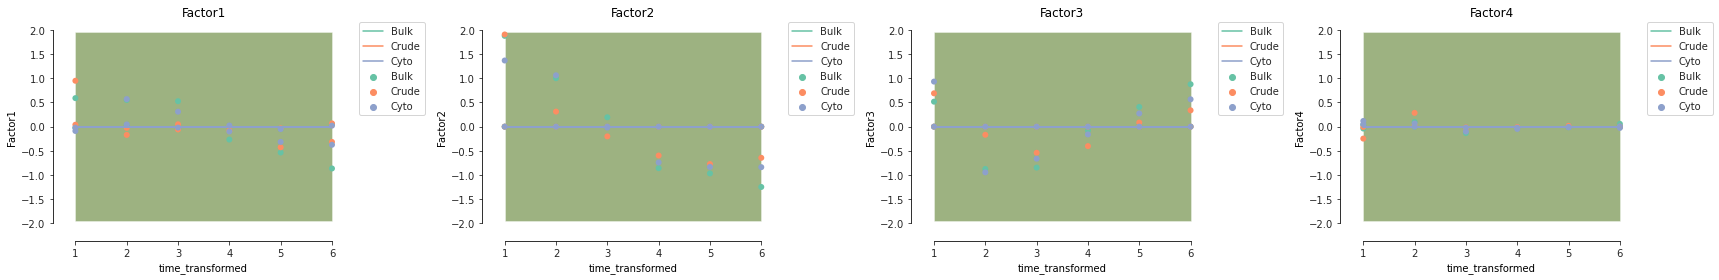

In [49]:
mofax.plot_interpolated_factors(model, factors=range(model.nfactors),
                                ncols=4, size=70)

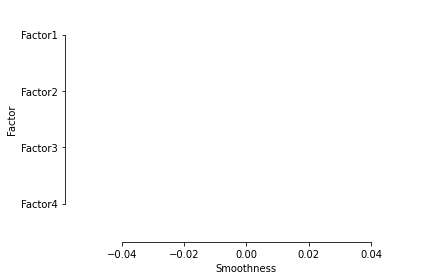

In [50]:
mofax.plot_smoothness(model)

In [18]:
data.head()

,Bias,view,sample,feature,value,time,group
0,GC-bias,Bulk_RNA,RNA_Bulk_RNA_1,1110008P14Rik_Bulk_RNA,1.301423,1,RNA
1,GC-bias,Bulk_RNA,RNA_Bulk_RNA_2,1110008P14Rik_Bulk_RNA,2.106330,2,RNA
2,GC-bias,Bulk_RNA,RNA_Bulk_RNA_3,1110008P14Rik_Bulk_RNA,1.576377,3,RNA
3,GC-bias,Bulk_RNA,RNA_Bulk_RNA_4,1110008P14Rik_Bulk_RNA,0.827082,4,RNA
4,GC-bias,Bulk_RNA,RNA_Bulk_RNA_5,1110008P14Rik_Bulk_RNA,0.549858,5,RNA


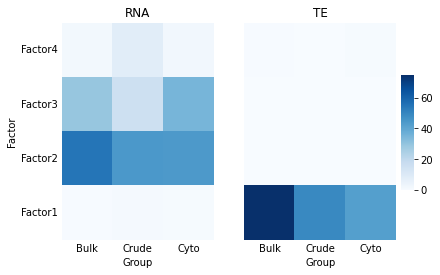

In [51]:
mofax.plot_r2(model, cmap='Blues')

## Factors vs Time

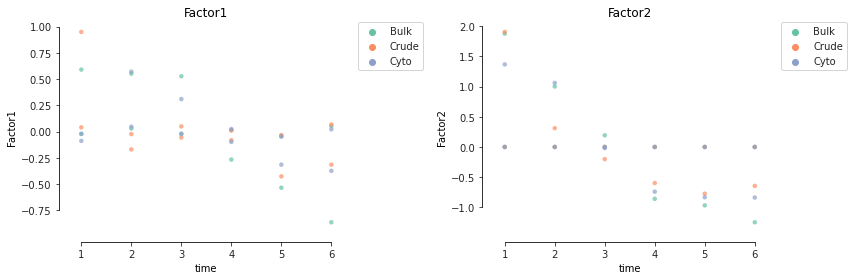

In [69]:
mofax.plot_factors(model, x='time', y=[0, 1],
                   color='group', alpha=.7)

In [ ]:
model.fetch_values

<bound method mofa_model.fetch_values of MOFA+ model: bf diff lfc
Samples (cells): 36
Features: 11574
Groups: RNA (18), TE (18)
Views: Bulk (3858), Crude (3858), Cyto (3858)
Factors: 4
Expectations: Sigma, W, Z

MEFISTO:
Covariates available: time
Interpolated factors for 6 new values>

In [ ]:
model.samples

{'RNA': array(['RNA_Bulk_RNA_1', 'RNA_Bulk_RNA_2', 'RNA_Bulk_RNA_3',
        'RNA_Bulk_RNA_4', 'RNA_Bulk_RNA_5', 'RNA_Bulk_RNA_6',
        'RNA_Cyto_RNA_1', 'RNA_Cyto_RNA_2', 'RNA_Cyto_RNA_3',
        'RNA_Cyto_RNA_4', 'RNA_Cyto_RNA_5', 'RNA_Cyto_RNA_6',
        'RNA_Crude_RNA_1', 'RNA_Crude_RNA_2', 'RNA_Crude_RNA_3',
        'RNA_Crude_RNA_4', 'RNA_Crude_RNA_5', 'RNA_Crude_RNA_6'],
       dtype='<U50'),
 'TE': array(['TE_Bulk_TE_1', 'TE_Bulk_TE_2', 'TE_Bulk_TE_3', 'TE_Bulk_TE_4',
        'TE_Bulk_TE_5', 'TE_Bulk_TE_6', 'TE_Cyto_TE_1', 'TE_Cyto_TE_2',
        'TE_Cyto_TE_3', 'TE_Cyto_TE_4', 'TE_Cyto_TE_5', 'TE_Cyto_TE_6',
        'TE_Crude_TE_1', 'TE_Crude_TE_2', 'TE_Crude_TE_3', 'TE_Crude_TE_4',
        'TE_Crude_TE_5', 'TE_Crude_TE_6'], dtype='<U50')}

In [ ]:
model.get()

,view,feature
0,Bulk,1110008P14Rik_Bulk
1,Bulk,1190002N15Rik_Bulk
2,Bulk,1600014C10Rik_Bulk
3,Bulk,1700017B05Rik_Bulk
4,Bulk,1700021F05Rik_Bulk
...,...,...
11569,Cyto,Zwilch_Cyto
11570,Cyto,Zwint_Cyto
11571,Cyto,Zxdc_Cyto
11572,Cyto,Zyg11b_Cyto


In [ ]:
model.get_views_contributions()

View,Bulk,Cyto,Crude
sample,,,
RNA_Bulk_1,0.698402,0.011373,0.290226
RNA_Bulk_2,0.945130,0.004464,0.050405
RNA_Bulk_3,0.820143,0.008827,0.171030
RNA_Bulk_4,0.774344,0.015533,0.210124
RNA_Bulk_5,0.936103,0.010482,0.053415
RNA_Bulk_6,0.991291,0.006022,0.002687
RNA_Cyto_1,0.001238,0.835455,0.163307
RNA_Cyto_2,0.000322,0.937081,0.062597
RNA_Cyto_3,0.000976,0.864492,0.134532


In [ ]:
model.groups

['RNA', 'TE']

In [ ]:
model.covariates_names

['time']

In [67]:
data.head()

,Bias,compartment,view,sample,feature,value,time,group
0,GC-bias,Cyto,RNA,RNA_Bulk_1,1110008P14Rik_RNA,1.301423,1,Bulk
1,GC-bias,Cyto,RNA,RNA_Bulk_2,1110008P14Rik_RNA,2.106330,2,Bulk
2,GC-bias,Cyto,RNA,RNA_Bulk_3,1110008P14Rik_RNA,1.576377,3,Bulk
3,GC-bias,Cyto,RNA,RNA_Bulk_4,1110008P14Rik_RNA,0.827082,4,Bulk
4,GC-bias,Cyto,RNA,RNA_Bulk_5,1110008P14Rik_RNA,0.549858,5,Bulk


In [72]:
mdata.mod.keys()

dict_keys(['RNA', 'TE'])

In [73]:
mdata.obsm

MuAxisArrays with keys: RNA, TE, X_mofa